# Support Vector Machines 
## Group Project - Fraud in Wine 

***
Due: 11:59PM, April 13, 2021

Files to submit:
1. .ipynb
2. a .pdf of your .ipynb

### Student Name: Chrisna Arie, Edwin Firmansyah, Sam Diab, Mouhamed Jaber
### Student Number: 58104399, 90320219, 13888318, 79588974
### Group: L2A Group 4

***
## Project Background

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor). Another common type of wine fraud involves counterfeiting by relabeling of infeior and cheaper wines to more expensive brands. 


## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**Overall Goal: Your overall goal is to use the wine dataset shown below to develop a support vector machine (SVM) model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.**

**Complete the 12 questioins below to follow along with the project.**

---
---

##  Explore the data: Complete the Question 1-Question 5

**Run the cells below to import the libraries and load the dataset.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("wine_fraud.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In the above dataset, the column of "quality" is the target column we are trying to predict. The values in the "quality" column are often called labels in supervised learning. To explore the labelled values in the "quality" column, we can use [`pandas.unique()`](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) to find out the unique values in the "quality" column.

**Question 1:<br> What are the unique values in the target column we are trying to predict (i.e.,the "quality" column)?**

Note: 
* Documentation link: [pandas.unique()](https://pandas.pydata.org/docs/reference/api/pandas.unique.html)

In [ ]:
# code here:

unique_classes = pd.unique(df['quality'])

print(f'There are {len(unique_classes)} unique classes in the Quality column which are:')

for i in range(len(unique_classes)):
  print(str(i+1), unique_classes[i], sep='.')

There are 2 unique classes in the Quality column which are:
1.Legit
2.Fraud


**Question 2: <br>
Create a histogram (or countplot) to display the count per category of "Legit" vs "Fraud" in the column of "quality"**

According to your plot, think about the question: is the label/target balanced or unbalanced?

Note: 
* Use `seaborn.countplot()` to plot. 
* Documentation link: [seaborn.countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html)

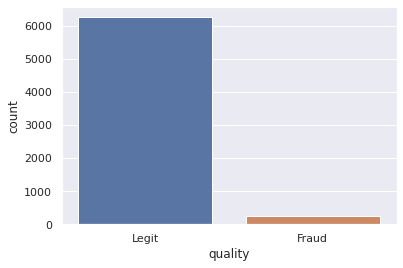

In [ ]:
# code here:

sns.set_theme(style="darkgrid")
sns.countplot(x="quality", data=df) 

This code compares the number of legit and fraud wines found in the data set it appears that the count for each label is unbalanced and there are more legitimate wines than fraudulent wines.

**Question 3: <br> Let's find out if there is a difference between red and white wine in terms of "Fraud" vs. "Legit" of the quality.<br> Create a histogram (or countplot) that has the wine "type" on the x axis with the "hue" separating columns by "Fraud" vs. "Legit".**

Note: 
* Use `seaborn.countplot()` to plot.
* Documentation link: [seaborn.countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html)
* The argument `x` axis should be the wine 'type', and the argument `hue` should be the wine 'quality' separating columns by "Fraud" vs "Legit".

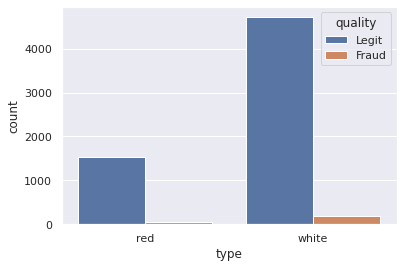

In [ ]:
# code here:

sns.set_theme(style="darkgrid")
sns.countplot(x="type", hue="quality", data=df) 

Observations are that:
1. There appeas to be more white wines in total in the dataset compared to red wines
2. There are less fraudulent red wines compared to white wines
3. There are less legitimate red wines compared to white wines

**Question 4:<br> What percentage of red wines are Fraud? What percentage of white wines are fraud?**

Note: 
* A part of code has been given below.
* Calculate the fraud percentages in read wines and while wines.
* Print out the results in the following format:<br>
    * `Percentage of fraud in Red Wines is :`
    * `Percentage of fraud in White Wines is :`

In [ ]:
reds = df[df["type"]=='red']
Fraud_reds = reds[reds['quality']=='Fraud']

In [ ]:
whites = df[df["type"]=='white']
Fraud_whites = whites[whites['quality']=='Fraud']

In [ ]:
# code here:
Percent_Fraud_reds_to_reds = len(Fraud_reds)/len(reds)*100
Percent_Fraud_whites_to_whites = len(Fraud_whites)/len(whites)*100

print(f'Percentage of fraud in Red Wines is : {Percent_Fraud_reds_to_reds:.2f}%')
print(f'Percentage of fraud in White Wines is : {Percent_Fraud_whites_to_whites:.2f}%')


Percentage of fraud in Red Wines is : 3.94%
Percentage of fraud in White Wines is : 3.74%


This code shows that the rate of fraud in each type of wine is roughly equivalent.

**Question 5:<br> Calculate the correlation between the various features and the "quality" column.**

Note: 
* A part of code has been given. In the given code, we have mapped the "quality" string 'Legit' to 0 and the string 'Fraud' to 1. We name the new column `"df['Fraud']"`.
* You can use `pandas.corr()` to calculate the whole correlation matrix, and then you can extract the `"Fraud"` column of the correlation matrix.
* Documentation link: [pandas.corr( )](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

According to the calculated correlations between the various features and the "quality" column, think about which feature has the most import impact on the "quality".

In [ ]:
# This line of code is to map the string 'Legit' to 0 and the string 'Fraud' to 1
df['Fraud']= df['quality'].map({'Legit':0,'Fraud':1})

In [ ]:
# obtain correlation matrix
df_standard_corr = df.corr(method='pearson')
#df_standard_corr = df.corr(method='pearson').round(4)
df_standard_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Fraud
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.021794
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.151228
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.061789
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.048756
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.034499
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,-0.085204
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.035252
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.016351
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.020107
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,-0.034046


In [ ]:
# obtain coefficients for the Fraud column in ascedning order
df_fraud_coefficients = df_standard_corr['Fraud']
print('Fraud column:\n',
      df_fraud_coefficients,'\n',
      sep='')

# convert coefficients to absolute values, then sort in descending order, then extract all features execpt 'Fraud'
df_fraud_abs_coefficients_descending = df_fraud_coefficients.abs().sort_values(ascending=False).drop('Fraud')

print('Features that impact the quality of wine from greatest to least importance\n'
      'based on the absolute values of the correlation coefficient of each features:\n',
      df_fraud_abs_coefficients_descending,'\n',
      sep='')

print('Therefore, order of most important features that affect quality in order of\n',
      'greatest to least importance are:', sep='')
for i in range(0, len(df_fraud_abs_coefficients_descending.index)):
  print(str(i+1), '. ', df_fraud_abs_coefficients_descending.index[i], sep='')

Fraud column:
fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

Features that impact the quality of wine from greatest to least importance
based on the absolute values of the correlation coefficient of each features:
volatile acidity        0.151228
free sulfur dioxide     0.085204
citric acid             0.061789
alcohol                 0.051141
residual sugar          0.048756
total sulfur dioxide    0.035252
chlorides               0.034499
sulphates               0.034046
fixed acidity           0.021794
pH                      0.020107
density                 0.016351
Name: Fraud, dtype: float64

Therefore, order

The first block of code uses the 'pearson' method of determining the coefficient of correleation between features. The 'pearson' method evalutes the standard coefficient of correlation, also known as the 'R' value in the field of linear regression.

The second block of code arranges the coefficients in descending order in terms of their absolute value, thus three most important features in descending order are: **volatile acidity, free sulfur dioxide and citric acid**.



----
## Machine Learning Model: Complete the Question 6-Question 12


**Now, we convert the categorical variables in the column "type" from the strings "red" or "white" to dummy variables:**

A dummy variable is one that takes only the value 0 or 1 to indicate the absence or presence of some categorical effect.

In [ ]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [ ]:
df = df.drop('Fraud',axis=1)

**Question 6:<br> Separate out the data into feature matrix $\mathbf X$ (i.e., to drop the "quality" column) and target label $\mathbf y$ (i.e., the "quality" column)**.

In [ ]:
#Zero = red | One = White
X = df.drop('quality', axis = 1)
y = df['quality']
print(f'X: {X} \n y: {y}')

X:       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  type
0               7.4              0.70         0.00  ...       0.56      9.4     0
1               7.8              0.88         0.00  ...       0.68      9.8     0
2               7.8              0.76         0.04  ...       0.65      9.8     0
3              11.2              0.28         0.56  ...       0.58      9.8     0
4               7.4              0.70         0.00  ...       0.56      9.4     0
...             ...               ...          ...  ...        ...      ...   ...
6492            6.2              0.21         0.29  ...       0.50     11.2     1
6493            6.6              0.32         0.36  ...       0.46      9.6     1
6494            6.5              0.24         0.19  ...       0.46      9.4     1
6495            5.5              0.29         0.30  ...       0.38     12.8     1
6496            6.0              0.21         0.38  ...       0.32     11.8     1

[6497 rows x

**Question 7:<br> Perform a Train|Test split on the data, with a 10% test size.** 

Note: 
* Use `train_test_split` from the module `sklearn.model_selection`.
* Set a random state of 101.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Question 8:<br> Scale the X_train (feature matrix of training dataset) and X_test (feature matrix of test dataset).**

**StandardScaler**: 

Standard Scaler transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. It arranges the data in a standard normal distribution. It is more useful in classification than regression.

Note:
* Create an scaler instance using `StandardScaler()` from the module `sklearn.preprocessing`.
* Documentation link: [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* After creating a StandardScaler instance (with default parameters), use the method `fit_transform()` to scale the X_train; use the method `transform()` to scale the X_test.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Question 9:<br> Create an instance of a Support Vector Machine classifier.**

Note:
* Use Scikit-learn support vector machine classifier `SVC` from the module `sklearn.svm`.
* Documentation link: [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
* We already know that the classes (or labels) are unbalanced. To deal with this issue, we can adjust weights inversely proportional to class frequencies in the input data **by setting the argument `class_weight` in the SVC( ) call**. Check out the sklearn.svm.SVC documentation and look up how to set the `class_weight` argument.

In [ ]:
from sklearn.svm import SVC
model = SVC(class_weight = 'balanced')

**Question 10:<br> Use a GridSearchCV to run a grid search to create a SVM model with the best C and gamma parameters.**

Note:
* Use `GridSearchCV` from the module `sklearn.model_selection`.
* Documentation link: [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
* Create an instance of GridSearchCV, where the estimator object (i.e., the argument **`estimator`) should set to be the SVC model created in Question 9**, and the parameter grid (i.e., the argument `param_griddict`) is suggested to set as `'C':[0.001,0.01,0.1,0.5,1], 'gamma':['scale','auto']`.
* Fit the training data to the models created by GridSearchCV. Make sure to use the **scaled** X_train (refer to Question 8) as the feature matrix for fitting.
* After finishing the fitting process, access the attribute `best_params_` of the GridSearchCV, print out the best C and gamma parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_griddict = {'C':[0.001,0.01,0.1,0.5,1], 'gamma':['scale','auto']}
grid = GridSearchCV(model,param_griddict)
grid.fit(X_train_scaled, y_train)
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [ ]:
print(f'Therefore the best parameters for C and gamma, based on the hyperparameter used, are 1 and ''auto'' respectively.')

Therefore the best parameters for C and gamma, based on the hyperparameter used, are 1 and auto respectively.


**Question 11:<br> Display the confusion matrix and classification report for your model.**

Note:
* Use `confusion_matrix`, `classification_report` from the module `sklearn.metrics`.
* After the grid search process of Question 10, you have a SVM model with the best C and gamma parameters. Use the fitting model to make predictions over the test dataset. Make sure to use the **scaled** X_test (refer Question 8).
* Once you have the predictions over the test dataset, you can call the function `confusion_matrix( )` to obtain the confusion matrix. Documentation link: [confusion_matrix( )](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Then you can display the classification report by calling the function `classification_report( )`. Documentation link: [classification_report( )](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [ ]:
optimised_model = SVC(C= 1, gamma= 'auto', class_weight = 'balanced')
optimised_model.fit(X_train_scaled,y_train)
optimised_preds = optimised_model.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,optimised_preds)

array([[ 17,  10],
       [ 92, 531]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test,optimised_preds).ravel()
print('''              Pred fraud   Pred legit
Actual fraud          17             10
Actual legit          92            531 
''')

print(f"tn = {tn}, fp = {fp}, fn = {fn}, tp = {tp}")

              Pred fraud   Pred legit
Actual fraud          17             10
Actual legit          92            531 

tn = 17, fp = 10, fn = 92, tp = 531


In [ ]:
print(classification_report(y_test, optimised_preds))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



**Question 12:<br> Finally, discuss about how well this model has performed. Would you suggest?**

Based on our confusion matrix, the model often predicts that a legitimate wine is actually legit. However, the model does not often predict that fraud wine is actually fraud.

**Analysis on Quality of Data and Correlated Features**

It was found that the labels for wine quality were fraud and legit. The frequency of these target labels were also found to be unbalanced according to Support results in the classification matrix. The Fraud support was much smaller compared to Legit support, in which these supports represented 10% of the entire data set. This made sense considering the histograms that were produced to compare the frequency of each label showed this trend as well.

Since most of the wine types in the data sample are legit wines,  the model was able to train on these samples and predict legit wines more accurately. Despite setting class weights to 'balanced' when creating our model to make more significant correction to the target label with fewer occurrences, the amount of fraud wine in the given data sample was still too low for the model to be trained well to make accurate predictions. 

Furthermore, based on the correlation coefficients evaluated in the correlation matrix, it was found that the features did not have very strong correlations to whether the wine was actually fraud. For example, based on the correlation matrix, the feature with the strongest correlation is much less than one (volatile acidity having a correlation coefficient of 0.15). This means that regardless of the features used to predict the quality of wine, it was difficult for the model to distinguish between fraud and legit wines using the given features.

**Evaluating Precision**

If this were to be used in practice, when our model predicts fraud, there is a higher chance that the wine is actually legit than actually fraud. This is reflected by a low precision for fraud in our classification report.

Conversely, when our model predicts legit, there is a higher chance that the wine is actually legit than actually fraud. This is reflected by a high precision for legit in our classification report.

**Evaulating Recall Scores**

Additionally, if our wine is actually fraud, there is a slightly higher change that it will predict it as fraud than legit. This is reflected in the classification report with a fraud recall of 0.63, meaning it does not provide confident predictions when we want the model to predict on fraud wines.

However, if our wine is actually legit, there is a significantly higher chance that it will predict it as legit. This is reflected in the classification report with a Legit recall of 0.85, meaning it does provide confident predictions when we want the model to predict on legit wines.

**Evaluating F1-Score**

An F1-score is a measure of a model's prediction accuracy on true target values. When considering the F1-score, it is important to be familiar with precision and recall. Precision is the fraction of relevant instances against the actual results, whereas recall is the fraction of relevant instances against the predicted results. The model reaches its best F1-score at 1 and worst score at 0. A F1-score of 1 means recall and precision are equally important. In our classification matrix, our fraud samples have an F1-score of 0.25 and our legit samples have an F1-score of 0.91. This makes sense considering the results from the confusion matrix. In the case of the fraud samples, only 17 values were correctly predicted to be fraud, whereas there were 92 cases where legit was incorrectly classified as fraud. On the other hand, in the case of the legit samples, only 10 cases were incorrectly predicted to be legit and should have been classified as fraud, and 531 cases were correctly predicted to be legit. This relates back to the F1-score as it demonstrates that correct legit predictions occurred as often as the frequency of true legit values and fraud predictions do not due to the small F1-score.

**Conclusion and Recommendation**

In conclusion, this model is not effective at identifying fraud wines. Since regardless of whether the model predicts fraud or legit, there is a greater chance that the wine is actually legit based on the precision results. Also, even if we make the model predict on fraud wine, the prediction results are not confident based on the recall results.

Therefore, we would not recommend this model to be used for the company at its current state. Other tunings of the SVM hyperparameters should be investigated as well. Other machine learning models should be investigated instead for this binary classification problem, such as decision trees, naive beyes theorem, and logistic regression after disretising the random variables (features). Finding a way to increase the number of samples for fraudulent wine so the model would have more samples to train and improve its ability to identify fraud wines.

